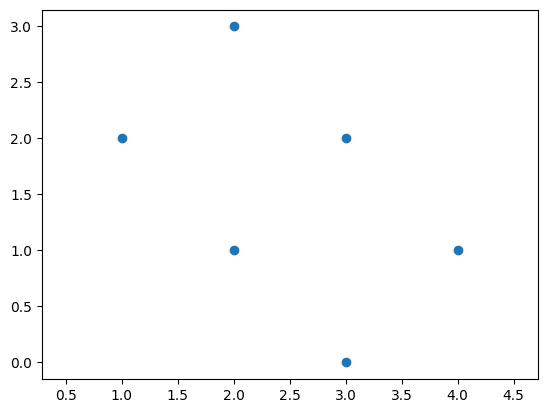

In [222]:
from matplotlib import pyplot as plt

# tilted 45° counterclockwise
rect = [(1,1), (2,0), (2,2), (3,1), (3,3), (4,2)]
# tilted 45° clockwise
# rect = [(3,0), (4,1), (3,2), (2,1), (1,2), (2, 3)]

cx,cy = zip(*rect)

plt.axis('equal')
plt.scatter(cx,cy)





In [223]:
import numpy as np
import math 

# rearrange coordinates so we can apply the rotation
locations = np.vstack([cx, cy]).T
print(locations)
print(locations.shape)

# since we only consider counterclockwise rotation we need to compute angles up to 180
angle_range = 180
angles_in_degree = np.arange(0, angle_range, 1)
angles = np.arange(0, angle_range / 180 * np.pi , angle_range / 180* np.pi / angle_range)

print("angle: ", angles)
print("angle in degrees: ", angles_in_degree)

# either rotation work
ROTATION = np.vstack(
    [
        -np.sin(angles),
        np.cos(angles),
    ]
)

# It works exactly the same
# ROTATION = np.vstack(
#     [
#         np.cos(angles),
#         np.sin(angles),
#     ]
# )



# cy coordinates after clockwise rotation
transform = locations @ ROTATION

# we can verify that is looks good for 90degree rotation
print(transform.shape)
print(transform)

# select max coordinates for each angle
max_y = transform.max(axis=0)
print(max_y)
# select min coordinates for each angle
min_y = transform.min(axis=0)
print(min_y)

# that is the distance between the top and bottom point of the rectangle
y_proj = max_y - min_y
print(y_proj)

# sanity check
# assert math.isclose(np.min(y_proj), 2 ** (1/2)) , np.min(y_proj)

# let's find the angle for which this distance is minimum,
# as it means the rectangle is aligned with this axis.
angle_index = np.argmin(y_proj)
print("angle index:", angle_index)
print("angle in degree", angles_in_degree[angle_index])

[[3 0]
 [4 1]
 [3 2]
 [2 1]
 [1 2]
 [2 3]]
(6, 2)
angle:  [0.         0.01745329 0.03490659 0.05235988 0.06981317 0.08726646
 0.10471976 0.12217305 0.13962634 0.15707963 0.17453293 0.19198622
 0.20943951 0.2268928  0.2443461  0.26179939 0.27925268 0.29670597
 0.31415927 0.33161256 0.34906585 0.36651914 0.38397244 0.40142573
 0.41887902 0.43633231 0.45378561 0.4712389  0.48869219 0.50614548
 0.52359878 0.54105207 0.55850536 0.57595865 0.59341195 0.61086524
 0.62831853 0.64577182 0.66322512 0.68067841 0.6981317  0.71558499
 0.73303829 0.75049158 0.76794487 0.78539816 0.80285146 0.82030475
 0.83775804 0.85521133 0.87266463 0.89011792 0.90757121 0.9250245
 0.9424778  0.95993109 0.97738438 0.99483767 1.01229097 1.02974426
 1.04719755 1.06465084 1.08210414 1.09955743 1.11701072 1.13446401
 1.15191731 1.1693706  1.18682389 1.20427718 1.22173048 1.23918377
 1.25663706 1.27409035 1.29154365 1.30899694 1.32645023 1.34390352
 1.36135682 1.37881011 1.3962634  1.41371669 1.43116999 1.44862328
 1.46

rotating by angle: -45°, which in radian is : -0.7853981633974483


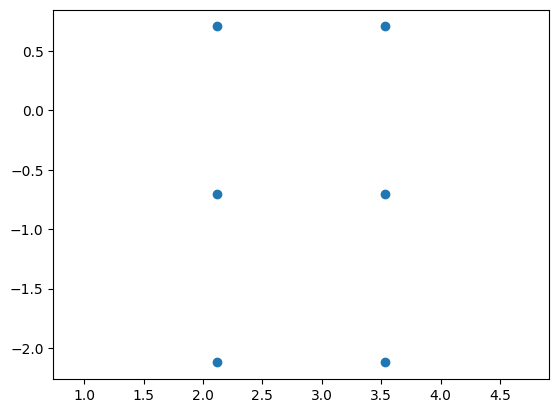

In [224]:
angle_in_degree = angles_in_degree[angle_index]
angle = angles[angle_index]

# to keep thing in positive coordinates
if angle_in_degree > 90:
    angle_in_degree -= 180
    angle -= np.pi
print(f"rotating by angle: {angle_in_degree}°, which in radian is : {angle}")

ROTATION_2D = np.array(
    [
        [np.cos(angle), np.sin(angle)],
        [-np.sin(angle), np.cos(angle)]
])


rotated_points = locations @ ROTATION_2D
plt.axis('equal')
plt.scatter(*zip(*rotated_points))

